In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
train = pd.read_csv("/Users/sara/Documents/training_set.csv")
test = pd.read_csv("/Users/sara/Documents/test_set.csv")

In [3]:
X_data = train.drop(columns=['ra', 'dec', 'class'])
Y_data = train['class']
X_test = test.drop(columns=['ra', 'dec', 'class'])
Y_test = test['class']

In [4]:
# Identifies optimal C parameter for linear SVM 
# cv=10 in GridSearchCV uses Stratified 10-fold validation

tuned_params = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100, 1000]}]

print('# Tuning hyper-parameters for accuracy')
print()
    
clf = GridSearchCV(SVC(), tuned_params, scoring='accuracy', cv=10)
clf.fit(X_data, Y_data)
    
print('Best parameters set found on development set:')
print()
print(clf.best_params_)
print()
print('Grid scores on development set:')
print()
means = clf.cv_results_['mean_test_score']
std = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, std, clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std*2, params))
print()


# Classification Report
print('Detailed classification report:')
print()
print('The model is trained on the full development set.')
print('The scores are computed on the full evaluation set.')
print()
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.875 (+/-0.032) for {'C': 0.01, 'kernel': 'linear'}
0.905 (+/-0.038) for {'C': 0.1, 'kernel': 'linear'}
0.907 (+/-0.037) for {'C': 1, 'kernel': 'linear'}
0.906 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.906 (+/-0.036) for {'C': 100, 'kernel': 'linear'}
0.906 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           1       0.94      1.00      0.97      2676
           2       0.90      0.92      0.91      1131
           3       0.89      0.73      0.80      1051

    accuracy                           0.92      4858
   macro avg       0.91      0.88      0.89      4858
weighted avg       0.92      0.92      0.92      4858




In [6]:
# initializing and training linear SVM

svc_linear = SVC(C=1, kernel='linear', probability=True)
svc_linear.fit(X_data, Y_data)

# computing linear SVC predictions with test data
Y_pred_linear = svc_linear.predict(X_test)

print(confusion_matrix(Y_test, Y_pred_linear))

[[2669    0    7]
 [   2 1037   92]
 [ 169  120  762]]


In [7]:
print(classification_report(Y_test, Y_pred_linear))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97      2676
           2       0.90      0.92      0.91      1131
           3       0.89      0.73      0.80      1051

    accuracy                           0.92      4858
   macro avg       0.91      0.88      0.89      4858
weighted avg       0.92      0.92      0.92      4858



In [8]:
# Training accuracy for linear SVM 
Y_pred_linear_train = svc_linear.predict(X_data)
linear_train_accuracy = accuracy_score(Y_data, Y_pred_linear_train)
linear_train_accuracy

0.9068521558800656

In [9]:
# Test accuracy for linear SVM
linear_test_accuracy = accuracy_score(Y_test, Y_pred_linear)
linear_test_accuracy

0.9197200494030465

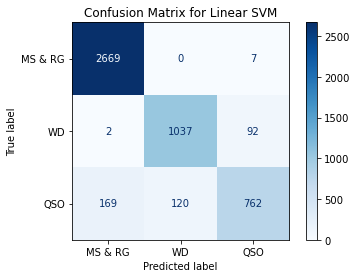

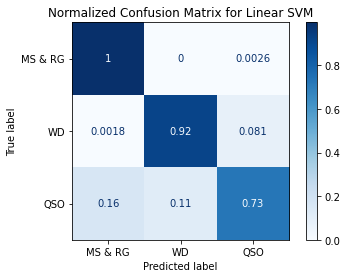

In [10]:
# plots confusion matrices for linear SVM
class_names = ['MS & RG', 'WD', 'QSO']

titles_options = [("Confusion Matrix for Linear SVM", None),
                  ("Normalized Confusion Matrix for Linear SVM", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(svc_linear, X_test, Y_test, 
                                                 display_labels=class_names, 
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [11]:
# 10-fold cross-validation for linear SVM
kfold = KFold(n_splits=10, random_state=300, shuffle=True)
svc_linear_results = cross_val_score(svc_linear, X_test, Y_test, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (svc_linear_results.mean()*100.0, svc_linear_results.std()*100.0))

Accuracy: 92.137% (1.475%)


In [12]:
# cv=10 in GridSearchCV uses Stratified 10-fold cross-validation
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-1, 4, 6)
gamma_range = np.logspace(-2, 3, 6)
param_grid = dict(kernel=['rbf'], gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(X_data, Y_data)

print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'} with a score of 0.96


In [13]:
# used this to get std for ideal params
means1 = grid.cv_results_['mean_test_score']
std1 = grid.cv_results_['std_test_score']

for mean, std, params in zip(means1, std1, grid.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std*2, params))
print()

0.620 (+/-0.032) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.895 (+/-0.035) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.909 (+/-0.035) for {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
0.945 (+/-0.023) for {'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}
0.956 (+/-0.013) for {'C': 0.1, 'gamma': 100.0, 'kernel': 'rbf'}
0.856 (+/-0.024) for {'C': 0.1, 'gamma': 1000.0, 'kernel': 'rbf'}
0.895 (+/-0.035) for {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.907 (+/-0.038) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.921 (+/-0.033) for {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.957 (+/-0.014) for {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
0.959 (+/-0.010) for {'C': 1.0, 'gamma': 100.0, 'kernel': 'rbf'}
0.931 (+/-0.019) for {'C': 1.0, 'gamma': 1000.0, 'kernel': 'rbf'}
0.907 (+/-0.039) for {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.912 (+/-0.037) for {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.941 (+/-0.026) for {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.960 (+/-0.014) for {'C': 10.0, 'gam

In [14]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

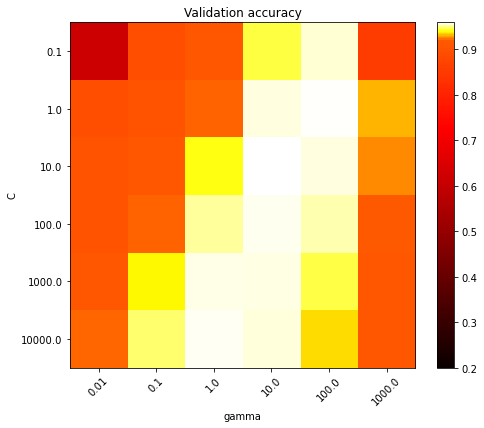

In [15]:
# outputs heatmap of best Gaussian SVM parameters
scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation="nearest", cmap=plt.cm.hot, 
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

In [16]:
# initializing and training Gaussian SVM
svc_Gauss = SVC(C=10, kernel='rbf', gamma=10, probability=True)
svc_Gauss.fit(X_data, Y_data)

# computing Gaussian SVM predictions with test data
Y_pred_Gauss = svc_Gauss.predict(X_test)

print(confusion_matrix(Y_test, Y_pred_Gauss))

[[2614    0   62]
 [   1 1107   23]
 [  33   73  945]]


In [17]:
print(classification_report(Y_test, Y_pred_Gauss))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      2676
           2       0.94      0.98      0.96      1131
           3       0.92      0.90      0.91      1051

    accuracy                           0.96      4858
   macro avg       0.95      0.95      0.95      4858
weighted avg       0.96      0.96      0.96      4858



In [18]:
# training accuracy for Gaussian SVM 
Y_pred_Gauss_train = svc_Gauss.predict(X_data)
Gauss_train_accuracy = accuracy_score(Y_data, Y_pred_Gauss_train)
Gauss_train_accuracy

0.962671735937095

In [19]:
# test accuracy for Gaussian SVM
Gauss_test_accuracy = accuracy_score(Y_test, Y_pred_Gauss)
Gauss_test_accuracy

0.9604775627830383

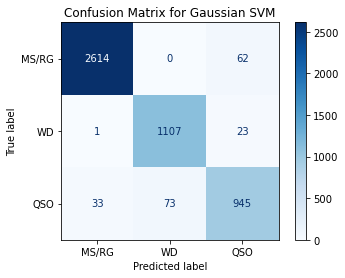

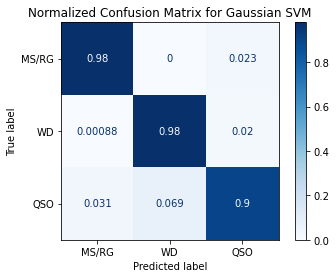

In [20]:
# plot confusion matrices for Gaussian SVM
class_names = ['MS/RG', 'WD', 'QSO']

titles_options = [("Confusion Matrix for Gaussian SVM", None),
                  ("Normalized Confusion Matrix for Gaussian SVM", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(svc_Gauss, X_test, Y_test, 
                                                 display_labels=class_names, 
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [21]:
# 10-fold cross-validation for Gaussian SVM
kfold = KFold(n_splits=10, random_state=300, shuffle=True)

svc_Gauss_results = cross_val_score(svc_Gauss, X_test, Y_test, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (svc_Gauss_results.mean()*100.0, svc_Gauss_results.std()*100.0))

Accuracy: 96.542% (0.886%)
